In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sal = pd.read_csv('IT Salary Survey EU  2020.csv')
sal.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [3]:
import sweetviz as sv
sal_sv_eda_report = sv.analyze(sal)
sal_sv_eda_report.show_html('sal_sv_eda_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sal_sv_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [4]:
sal.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [5]:
sal.isna().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         27
Gender                                                                                                                      10
City                                                                                                                         0
Position                                                                                                                     6
Total years of experience                                                                                                   16
Years of experience in Germany                                                                                              32
Seniority level                                                                                                

In [6]:
# Dropping some cloumns

In [7]:
sal1 = sal.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR'])

In [8]:
sal1.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [9]:
# renaming some columns

In [10]:
sal1.rename(columns = {'Your main technology / programming language': 'Main technology', 'Position ': 'Position',
                     'Other technologies/programming languages you use often': 'Other technologies', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary', 'Number of vacation days': 'Vacation days', 
                     'Main language at work': 'Language at work','Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'Years of experience' }, inplace = True)

In [11]:
sal1.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29,Full-time employee,Unlimited contract,English,101-1000,Product


<AxesSubplot:xlabel='Years of experience', ylabel='count'>

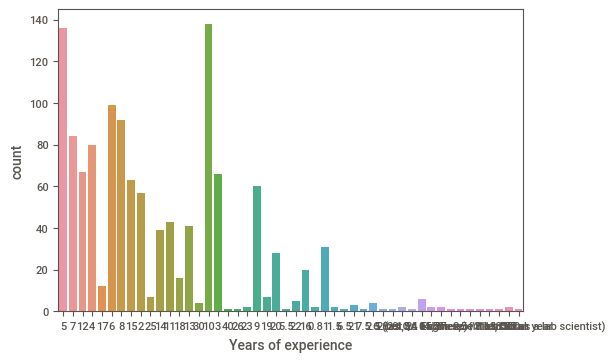

In [12]:
sns.countplot(x=sal1['Years of experience'])

In [13]:
sal1.groupby('Years of experience').count()

,Age,Gender,City,Position,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
Years of experience,,,,,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6,6,6,6,6
0.8,2,2,2,2,2,2,2,2,2,2,2,2,2,2
1,30,31,31,31,30,31,26,31,27,30,29,30,30,30
1 (as QA Engineer) / 11 in total,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"1,5",2,2,2,2,2,2,2,2,2,2,2,2,2,2
1.5,2,2,2,2,2,2,2,2,2,2,2,2,2,2
10,135,137,138,138,137,125,126,138,128,137,136,138,138,136
11,42,43,43,43,43,37,39,43,41,43,43,43,43,43
12,66,67,67,67,67,60,61,67,63,67,66,67,66,65


In [14]:
sal1.groupby('Vacation days').count()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Employment status,Сontract duration,Language at work,Company size,Company type
Vacation days,,,,,,,,,,,,,,
(no idea),1,1,1,1,1,1,0,0,1,1,1,1,1,1
0,4,4,4,4,4,4,4,4,4,4,4,4,4,4
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1
12,2,2,2,2,2,2,2,2,2,2,2,2,2,2
14,3,3,3,3,3,3,3,3,3,3,3,3,3,3
15,2,2,2,2,2,2,2,2,2,2,2,2,2,2
16,1,1,1,1,1,1,1,1,1,1,1,1,1,1
20,12,12,13,13,12,13,10,9,13,13,13,13,13,13


In [15]:
sal1.groupby('Age').count()

,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
Age,,,,,,,,,,,,,,
20.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
21.0,1,1,1,1,1,0,0,1,0,0,0,0,0,0
22.0,8,8,8,8,8,8,5,8,7,8,8,8,8,8
23.0,12,12,12,12,12,11,11,12,10,12,12,12,12,12
24.0,28,28,28,28,26,25,26,28,26,27,26,27,27,28
25.0,42,42,42,42,42,42,40,42,41,41,41,41,41,41
26.0,59,59,59,59,58,57,53,59,58,59,58,59,59,58
27.0,58,58,58,58,58,54,48,58,53,56,55,56,56,55
28.0,87,87,87,87,87,77,70,87,84,85,84,86,85,84


In [16]:
sal1.groupby('Yearly salary').count()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
Yearly salary,,,,,,,,,,,,,,
1.000100e+04,2,2,2,2,2,2,2,2,1,2,2,2,2,2
1.016400e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.100000e+04,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1.150000e+04,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1.200000e+04,2,2,2,2,2,2,2,2,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.500000e+05,1,1,1,1,1,1,1,0,1,1,1,1,1,1
3.000000e+05,1,1,1,1,1,1,1,1,0,1,0,1,1,1
8.500000e+05,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [17]:
sal1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1226 non-null   float64
 1   Gender               1243 non-null   object 
 2   City                 1253 non-null   object 
 3   Position             1247 non-null   object 
 4   Years of experience  1237 non-null   object 
 5   Seniority level      1241 non-null   object 
 6   Main technology      1126 non-null   object 
 7   Other technologies   1096 non-null   object 
 8   Yearly salary        1253 non-null   float64
 9   Vacation days        1185 non-null   object 
 10  Employment status    1236 non-null   object 
 11  Сontract duration    1224 non-null   object 
 12  Language at work     1237 non-null   object 
 13  Company size         1235 non-null   object 
 14  Company type         1228 non-null   object 
dtypes: float64(2), object(13)
memory usage

In [18]:
# we have some non numeric columns that we need to clean up
# we have 27 NA values in Age
# we need to change Year of Experience into int dtype
# We can use coerce to handle the errors that will come for trying to covert the text to int 
# and it will replace them as Nan

In [19]:
sal1['Vacation days'] = pd.to_numeric(sal1['Vacation days'], errors = 'coerce').fillna(0).astype(int)
sal1['Years of experience'] = pd.to_numeric(sal1['Years of experience'], errors = 'coerce').fillna(0).astype(int)
sal1['Age'] = sal1['Age'].fillna(0).astype(int)
sal1['Yearly salary'] = sal1['Yearly salary'].astype(int)

<AxesSubplot:xlabel='Yearly salary'>

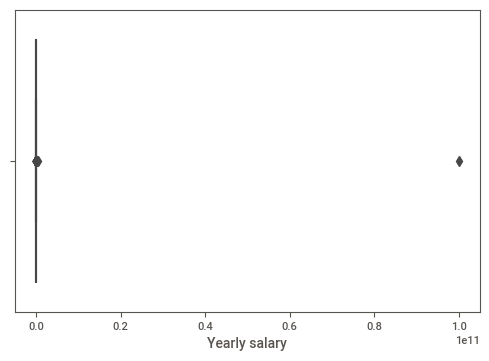

In [20]:
sns.boxplot(data=sal1,x=sal1['Yearly salary'])

In [21]:
# The box plot looks funny because of the outliers. we need to remove the outliers
# let's see which are the ones that are major outliers
sal1['Yearly salary'].sort_values()

982           10001
883           10001
366           10164
770           11000
1135          11500
           ...     
630          250000
576          300000
778          850000
853       500000000
473     99999999999
Name: Yearly salary, Length: 1253, dtype: int64

In [22]:
# let's drop the last three
sal2 = sal1.drop(index = [473, 778, 853])
sal2['Yearly salary'].sort_values()

982      10001
883      10001
366      10164
770      11000
1135     11500
         ...  
441     200000
574     200000
804     240000
630     250000
576     300000
Name: Yearly salary, Length: 1250, dtype: int64

<AxesSubplot:xlabel='Yearly salary'>

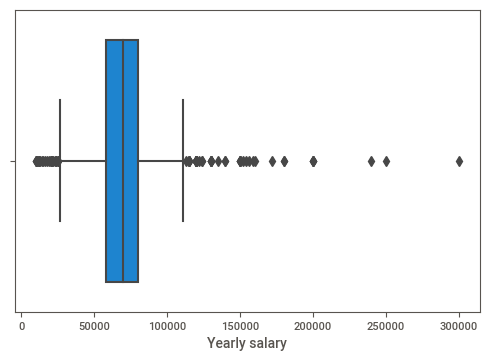

In [23]:
sns.boxplot(data=sal2,x=sal2['Yearly salary'])

In [24]:
# the data still has lot of outliers. Let's review some other data as well

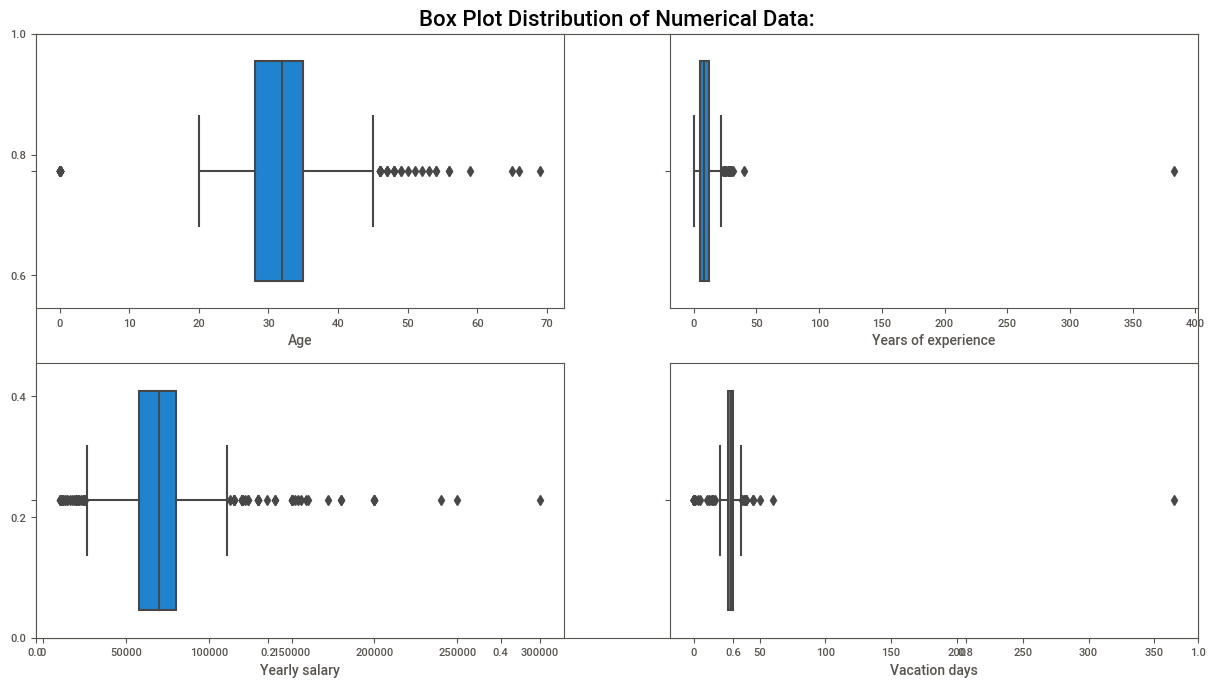

In [25]:
fig = plt.figure(figsize= (15, 8))
plt.title('Box Plot Distribution of Numerical Data:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = sal2, x= 'Age', ax = axs[0,0])
sns.boxplot(data = sal2, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = sal2, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = sal2, x= 'Vacation days', ax= axs[1,1])
plt.show()

In [26]:
# All the data has outliers. Let's write a function to drop outliers, so that we can call 
# the same function to do it for all items

In [27]:
# we can create a new df with only the relevant column and remove the outliers. 
# we will create a function and use it to analyse the data
# take dataframe and column name as inputs, return dataframe with 
# one single column cleaned up / reduced in rows based on outliers
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [28]:
age = outliers(sal2, 'Age')
experience = outliers(sal2, 'Years of experience')
salary = outliers(sal2, 'Yearly salary')
vacation = outliers(sal2, 'Vacation days')

In [29]:
# we have now created a cleaned up data as 4 difference dataframes and we can look into this now

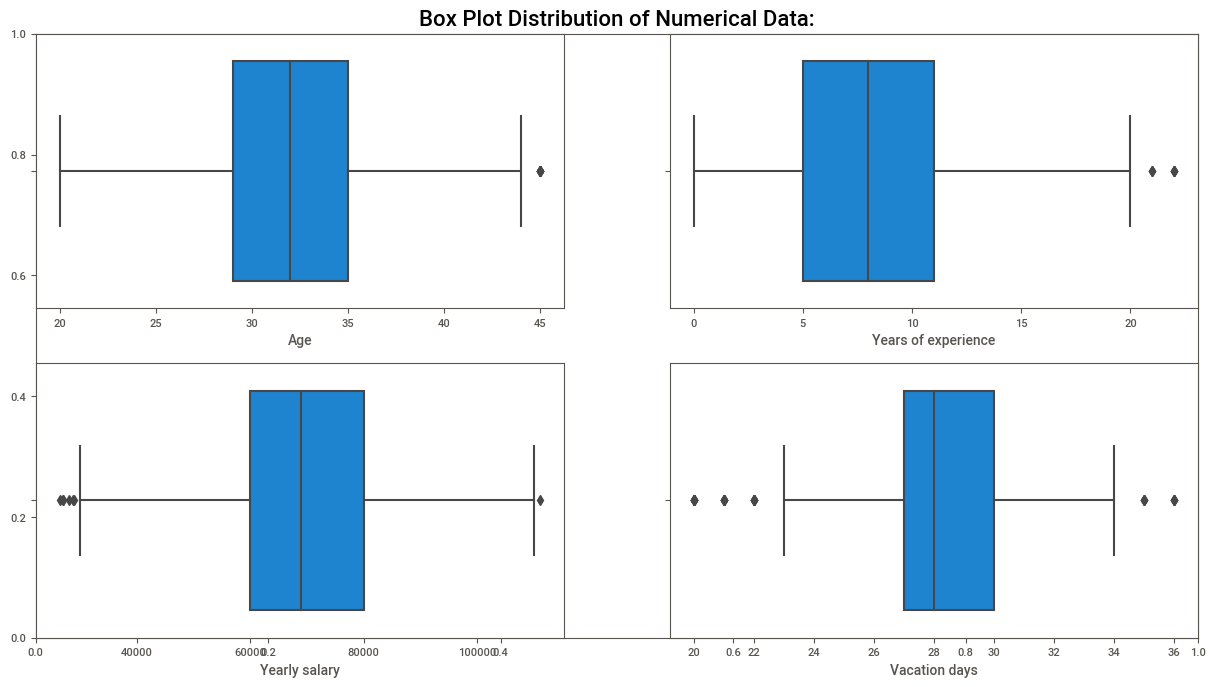

In [30]:
fig = plt.figure(figsize= (15, 8))
plt.title('Box Plot Distribution of Numerical Data:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = experience, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = salary, x= 'Yearly salary',ax = axs[1,0])
sns.boxplot(data = vacation, x= 'Vacation days', ax= axs[1,1])
plt.show()

In [31]:
# This data looks much much better than what it used to be

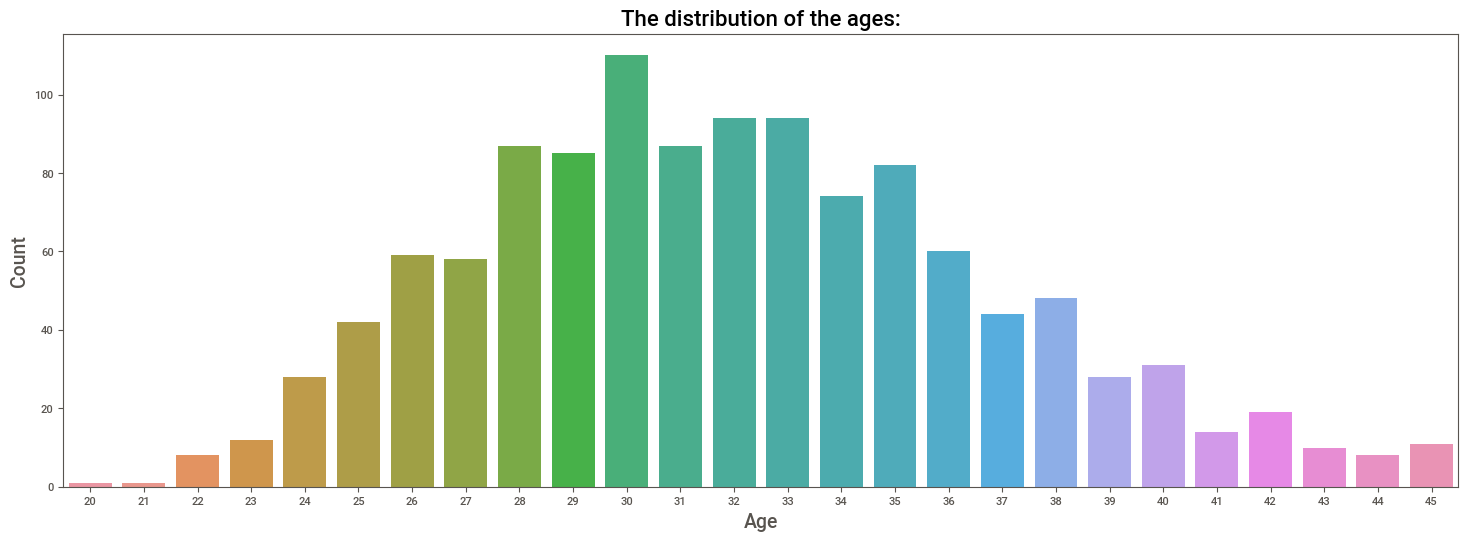

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(data= age, x='Age')
plt.title('The distribution of the ages:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Count', fontsize = 14)
plt.show()

In [33]:
age.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,29,Full-time employee,Unlimited contract,English,101-1000,Product


In [34]:
#Let's explore various columns and analyse the data

In [35]:
age_salary = age.groupby('Age').median()
age_salary.head()

,Years of experience,Yearly salary,Vacation days
Age,,,
20,5.0,240000.0,27.0
21,2.0,50000.0,0.0
22,2.5,37000.0,24.0
23,3.5,51100.0,28.0
24,3.0,57800.0,27.0


In [36]:
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly salary',palette= 'flare')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

ValueError: Could not interpret input 'Age'

In [37]:
# We are unable to read column name Age because it is considered s index. We need to fix itb

In [38]:
age_salary = age.groupby('Age', as_index = False).median()
age_salary.head()

,Age,Years of experience,Yearly salary,Vacation days
0,20,5.0,240000.0,27.0
1,21,2.0,50000.0,0.0
2,22,2.5,37000.0,24.0
3,23,3.5,51100.0,28.0
4,24,3.0,57800.0,27.0


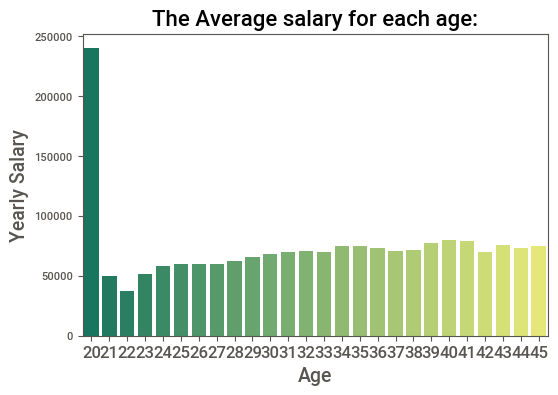

In [39]:
sns.barplot(data= age_salary, x= 'Age', y= 'Yearly salary',palette= 'summer')
plt.title('The Average salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

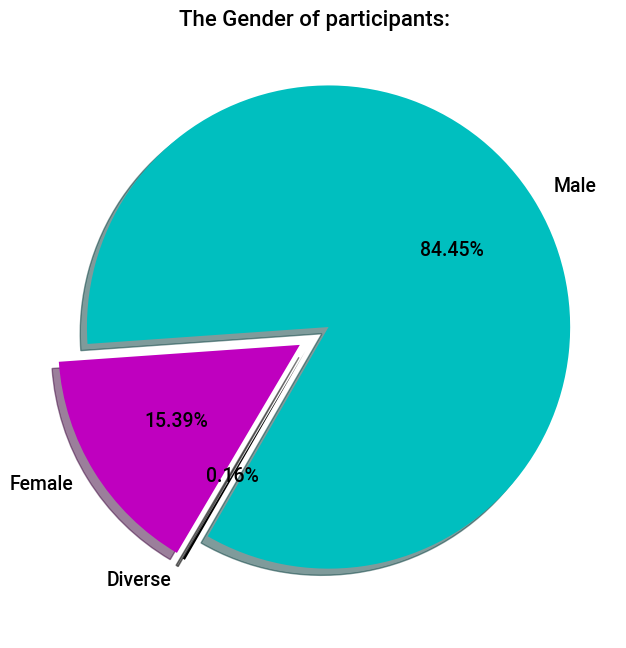

In [40]:
# the gender of participants:
# let's look at the overall age distribution
plt.figure(figsize= (18, 8))
sal2['Gender'].value_counts().plot.pie(autopct= '%1.2F%%', fontsize= 14, startangle= 240, explode= [0.07]*3, shadow= True, colors = ['c','m','k'])
plt.title('The Gender of participants:',fontsize = 16)
plt.ylabel('')
plt.show()

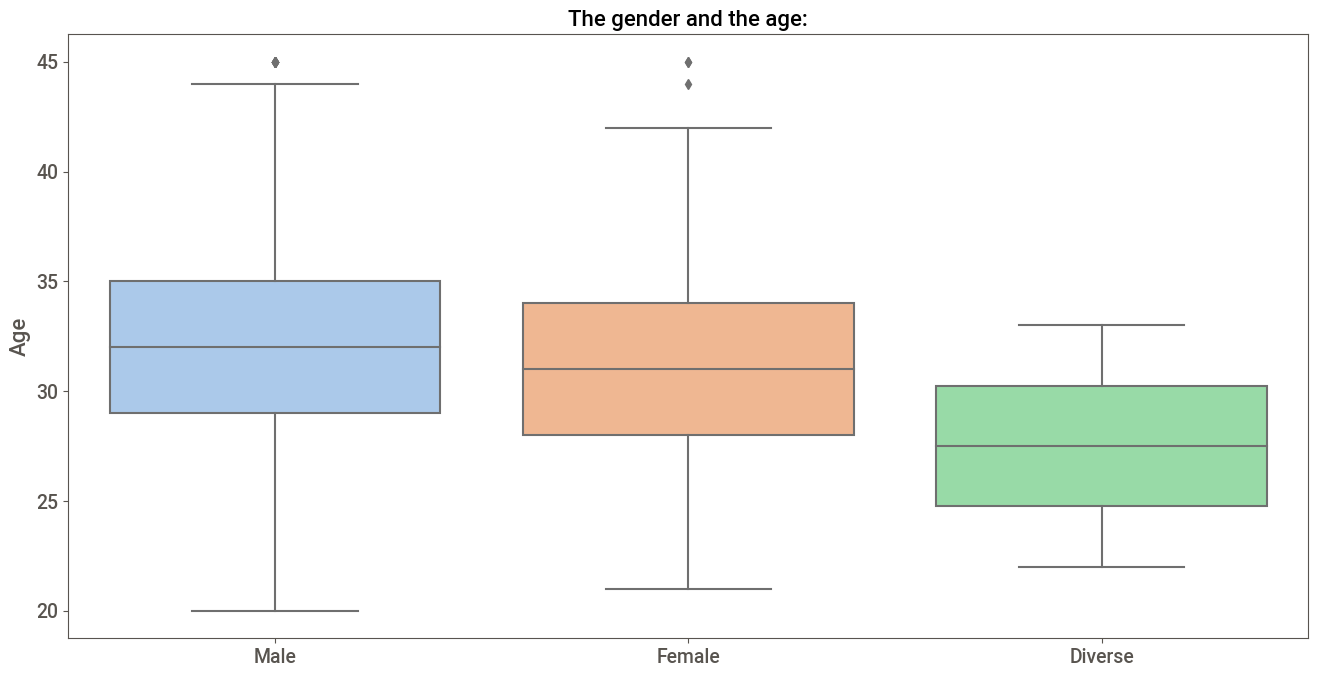

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(data= age, x= age['Gender'], y= age['Age'], palette= 'pastel')
plt.title('The gender and the age:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Age', fontsize= 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

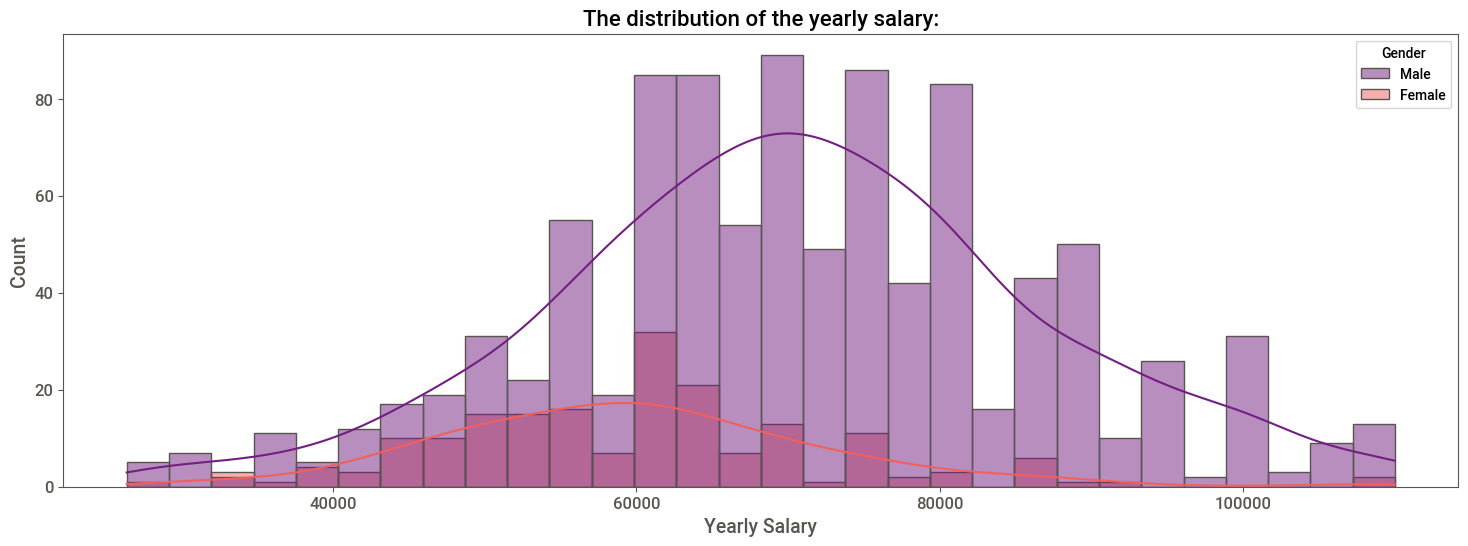

In [42]:
# the distribution of yearly salary:

plt.figure(figsize=(18,6))
sns.histplot(data= salary, x= 'Yearly salary', hue= 'Gender', palette= 'magma', kde= True, bins = 30)
plt.title('The distribution of the yearly salary:',fontsize= 16)
plt.xlabel('Yearly Salary', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

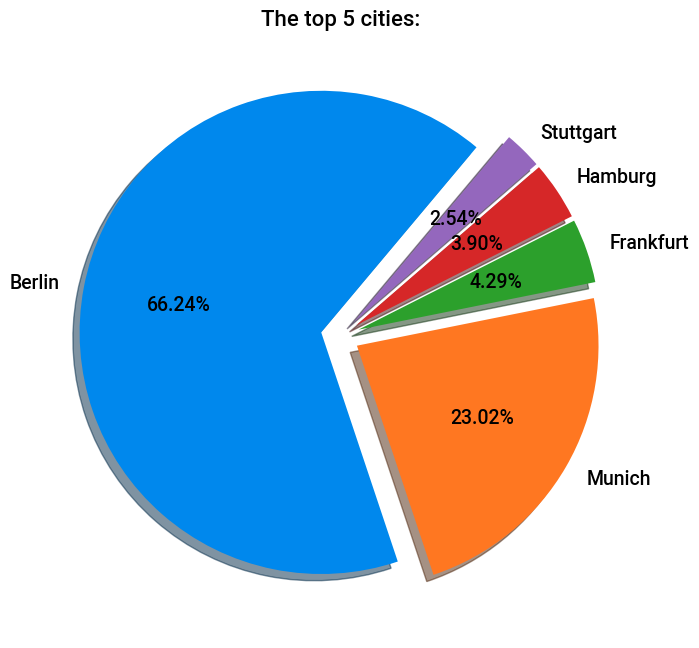

In [43]:
plt.figure(figsize= (18,8))
plt.pie(sal2['City'].value_counts().head(5), labels=sal2['City'].value_counts().head(5).index ,textprops ={'fontsize' : 14}, 
        explode= [0.08]*5, shadow= True, startangle= 50, autopct= '%1.2F%%')
plt.title('The top 5 cities:', fontsize= 16)
plt.show()

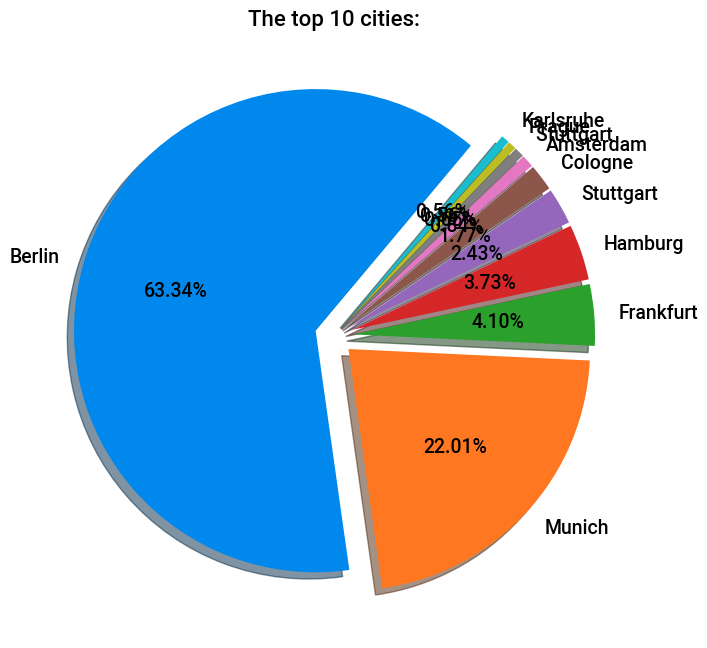

In [44]:
# let's see top 10
plt.figure(figsize= (18,8))
plt.pie(sal2['City'].value_counts().head(10), labels=sal2['City'].value_counts().head(10).index ,textprops ={'fontsize' : 14}, 
        explode= [0.08]*10, shadow= True, startangle= 50, autopct= '%1.2F%%')
plt.title('The top 10 cities:', fontsize= 16)
plt.show()

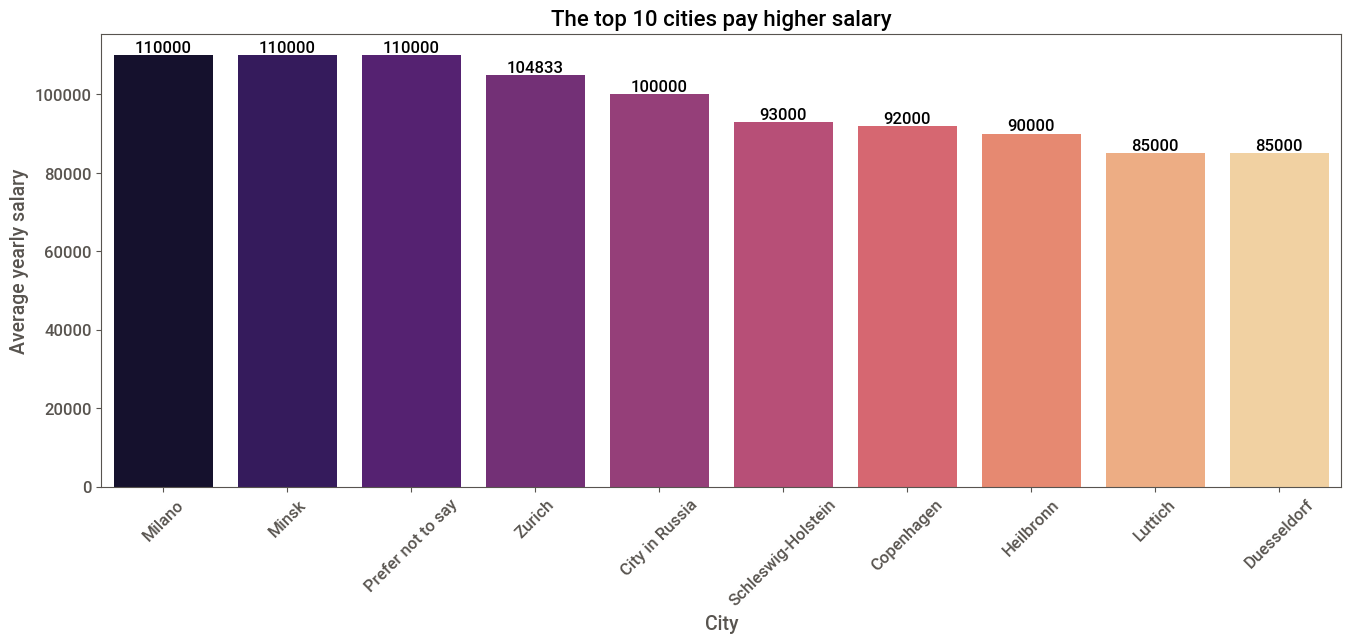

In [45]:
# The top 10 cities pay the higher salary:

salary_city = salary.groupby('City', as_index= False).mean().sort_values('Yearly salary', ascending = False) 
# sort cities according to the salary


salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= salary_city, x= 'City', y= 'Yearly salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)
plt.bar_label(ax.containers[0], label_type = 'edge',fontsize = 12)
plt.show()

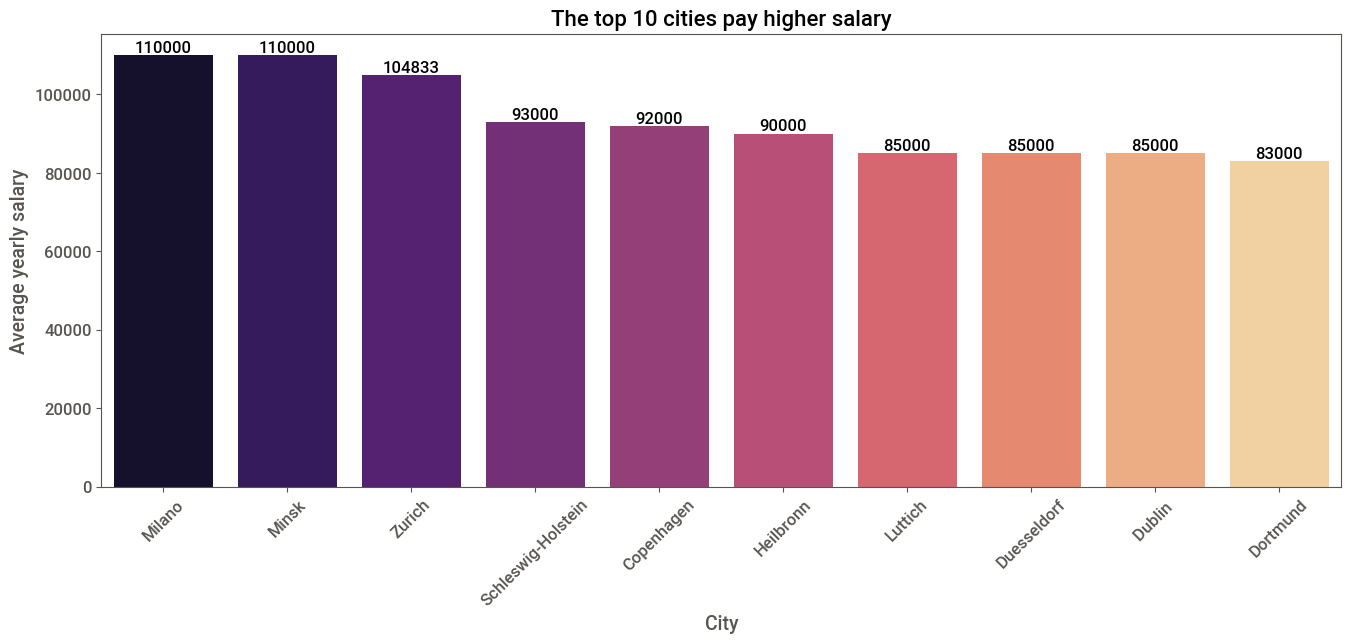

In [46]:
# two values in top 10 are not cities so droped them:
salary_city = salary.groupby('City', as_index= False).mean().sort_values('Yearly salary', ascending = False) 

salary_city = salary_city.drop(index= [81, 15])
salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= salary_city, x= 'City', y= 'Yearly salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 45)
plt.yticks(fontsize = 12)
plt.bar_label(ax.containers[0], label_type = 'edge',fontsize = 12)
plt.show()

In [47]:
# the realation between the seniority level and years of experience:

experience['Seniority level'].value_counts()

Senior                       554
Middle                       364
Lead                         161
Junior                        79
Head                          40
Principal                      3
student                        1
Intern                         1
Entry level                    1
Working Student                1
C-Level                        1
Student                        1
intern                         1
Director                       1
C-level executive manager      1
Key                            1
No level                       1
CTO                            1
Work Center Manager            1
Manager                        1
VP                             1
No level                       1
Self employed                  1
Name: Seniority level, dtype: int64

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 20.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


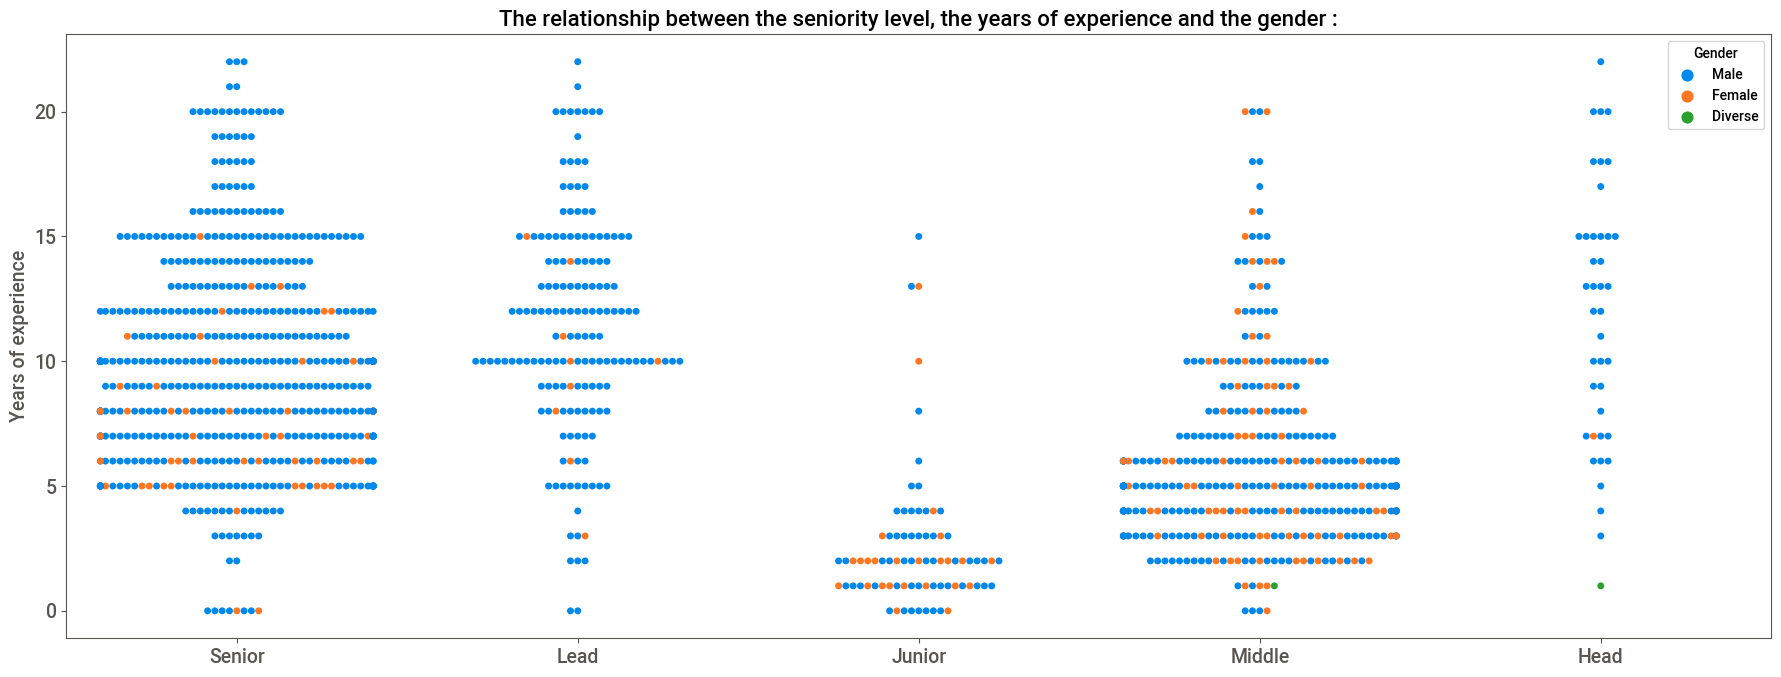

In [48]:
# Let's drop all the items except the top 5

experience_seniority = experience.loc[experience['Seniority level'].isin(['Senior', 'Middle','Lead', 'Junior', 'Head'])]


plt.figure(figsize=(22, 8))
sns.swarmplot(data= experience_seniority, x='Seniority level', y= 'Years of experience',s = 5, hue= 'Gender')
plt.title('The relationship between the seniority level, the years of experience and the gender :', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience' ,fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize = 14)
plt.show()

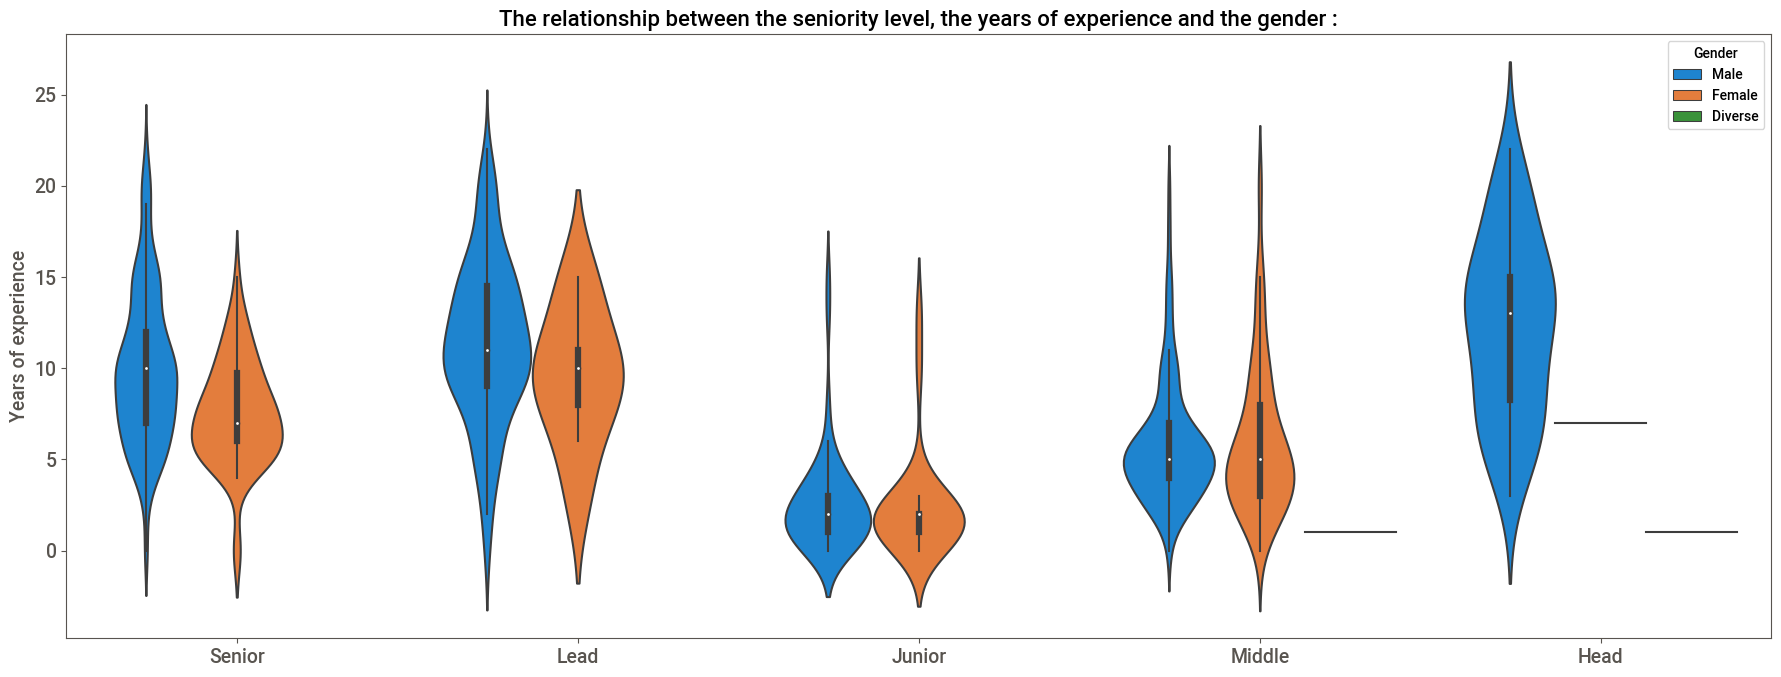

In [49]:
# Let's drop all the items except the top 5

experience_seniority = experience.loc[experience['Seniority level'].isin(['Senior', 'Middle','Lead', 'Junior', 'Head'])]


plt.figure(figsize=(22, 8))
sns.violinplot(data= experience_seniority, x='Seniority level', y= 'Years of experience',hue= 'Gender')
plt.title('The relationship between the seniority level, the years of experience and the gender :', fontsize = 16)
plt.xlabel('')
plt.ylabel('Years of experience' ,fontsize= 14)
plt.xticks(fontsize= 14)
plt.yticks(fontsize = 14)
plt.show()

In [50]:
# Sad to see that there are no females in the head level

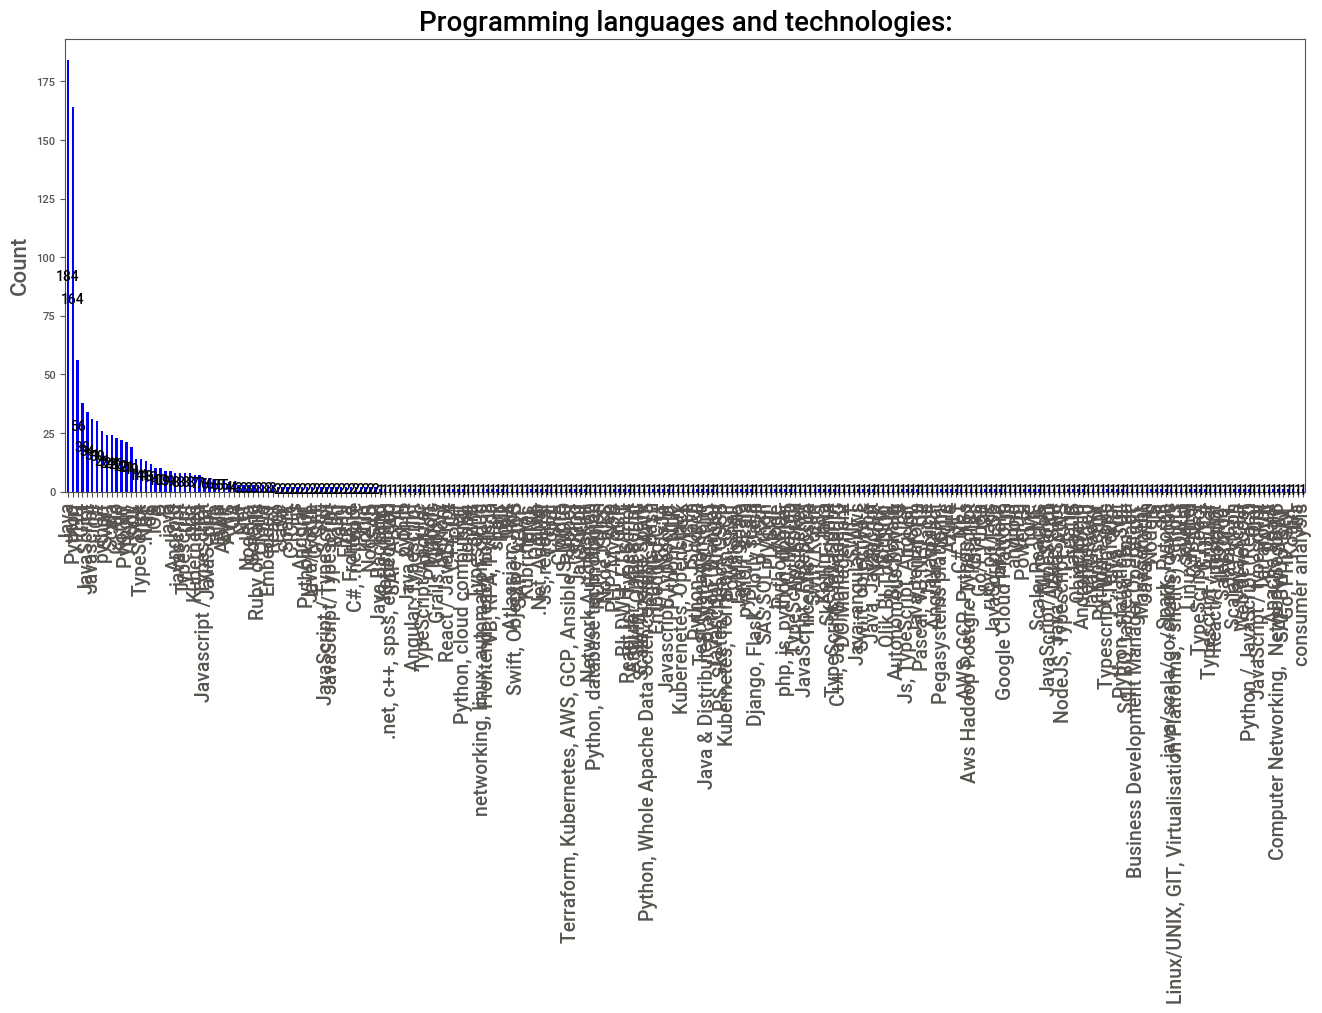

In [51]:
plt.figure(figsize=(16, 6))
ax = sal2['Main technology'].value_counts().plot(kind = 'bar', color = 'blue')
plt.title('Programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14)
plt.bar_label(ax.containers[0], label_type = 'center')
plt.show()

In [52]:
pd.crosstab(sal2['Main technology'],sal2['Gender'],normalize = True, margins = True).sort_values(by="All",ascending=False)

Gender,Diverse,Female,Male,All
Main technology,,,,
All,0.001789,0.141324,0.856887,1.000000
Java,0.000000,0.030411,0.134168,0.164580
Python,0.000000,0.016995,0.127907,0.144902
PHP,0.000000,0.002683,0.046512,0.049195
C++,0.000000,0.000894,0.033095,0.033989
...,...,...,...,...
Management,0.000000,0.000894,0.000000,0.000894
Ml/Python,0.000000,0.000894,0.000000,0.000894
"NLP, Python",0.000000,0.000000,0.000894,0.000894


In [53]:
# after the top 3, rest all programming languages seems to be less than 5%. 
# Also, we see python itself in mulitple places. We need to clean this up to get any meaningful insight

In [54]:
# the distribution of programing languages:

# We noticed that there are many repeated values in different forms (for example we have :javascript, Javascript, JavaScript, Js, js)
# so we will unify them:

sal2 = sal2.replace(['javascript','Javascript', 'js', 'JS'], 'JavaScript')
sal2 = sal2.replace(['python', 'Python '], 'Python')
sal2 = sal2.replace('c++', 'C++')
sal2 = sal2.replace(['.net', '.Net'], '.NET')
sal2 = sal2.replace(['Sql', 'sql'], 'SQL')
sal2 = sal2.replace(['php','Php'], 'PHP')
sal2 = sal2.replace('java', 'Java')
sal2 = sal2.replace(['typescript', 'Typescript'], 'TypeScript')

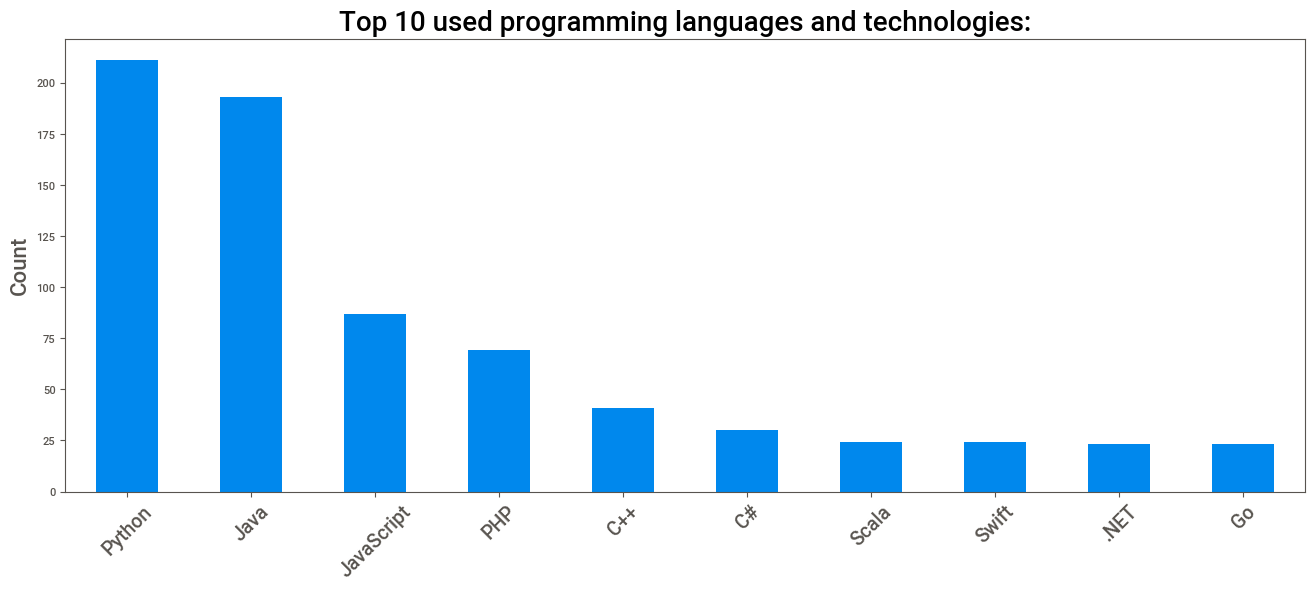

In [55]:
# top 10 programming languages and technologies:

plt.figure(figsize=(16, 6))
ax = sal2['Main technology'].value_counts().head(10).plot(kind = 'bar')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.show()

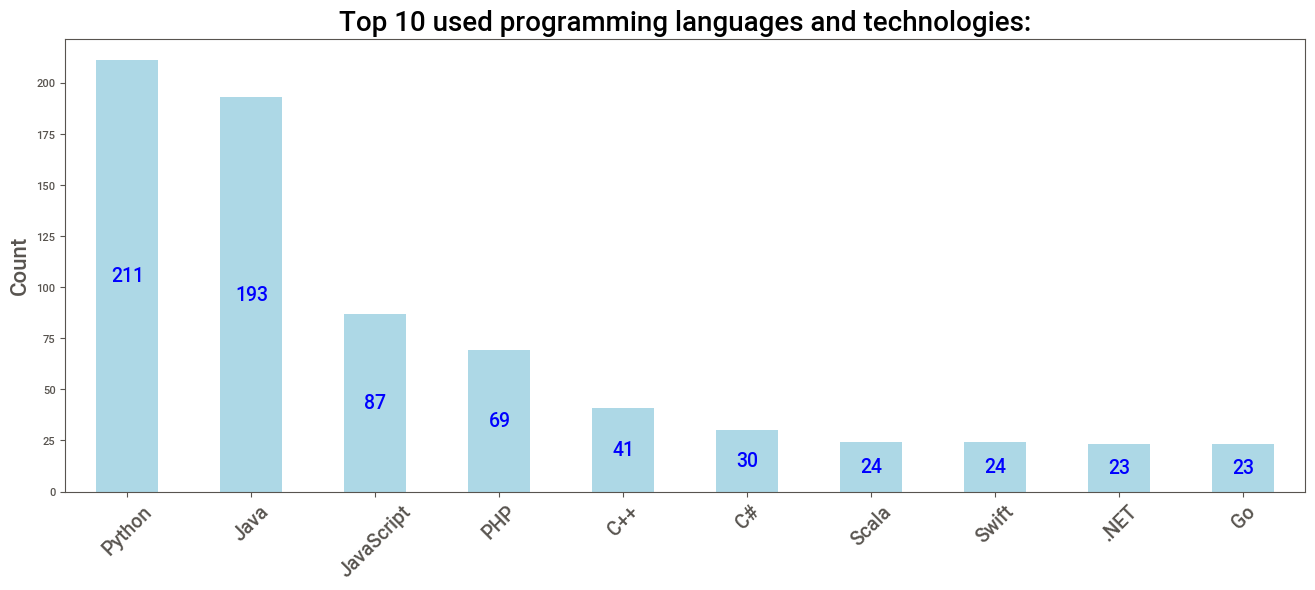

In [56]:
# let's add labels
plt.figure(figsize=(16, 6))
ax = sal2['Main technology'].value_counts().head(10).plot(kind = 'bar', color = 'lightblue')
plt.title('Top 10 used programming languages and technologies:', fontsize = 20)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 14, rotation = 45)
plt.bar_label(ax.containers[0], label_type = 'center',fontsize = 14, color = 'b')
plt.show()

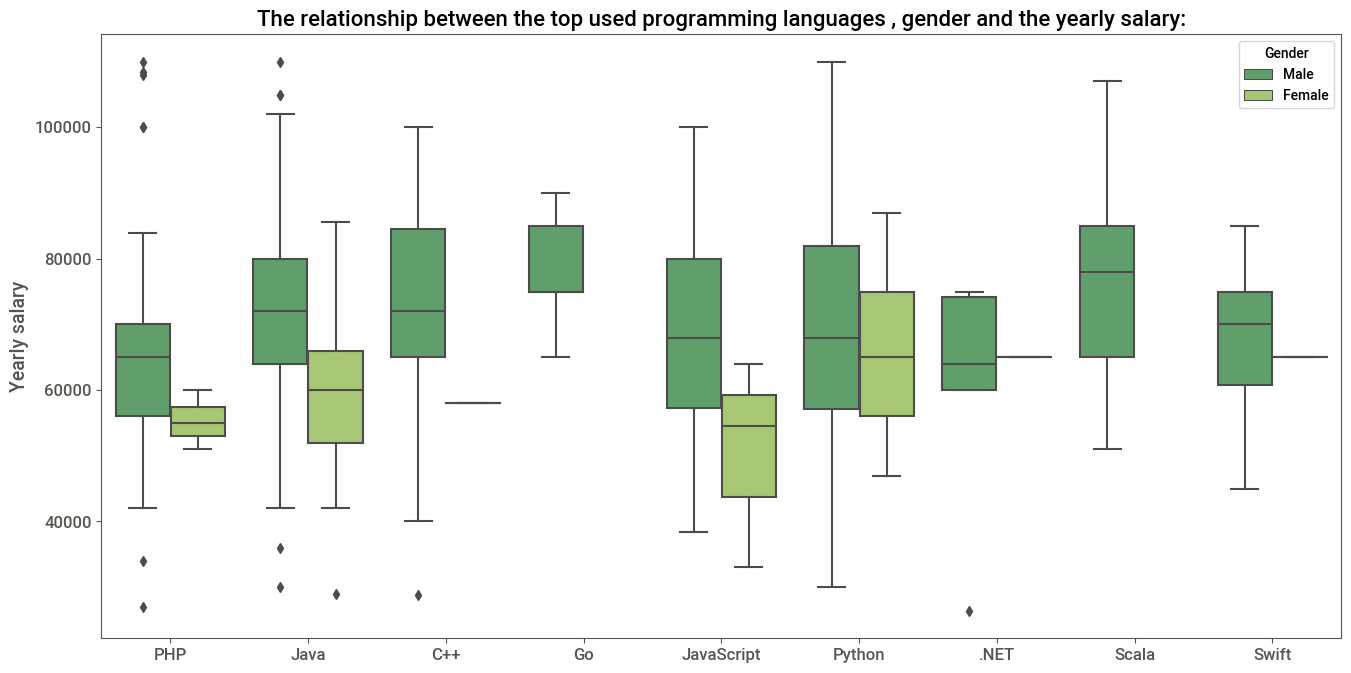

In [57]:
# the relationship between the programming languages , gender and the yearly salary:

salary_language = salary.loc[salary['Main technology'].isin(['Python', 'Java', 'JavaScript', 'PHP', 'C++', 'Scala', 'Swift', '.NET', 'Go'])]

plt.figure(figsize = (16,8))
sns.boxplot(data = salary_language, x = 'Main technology', y= 'Yearly salary', hue = 'Gender', palette = 'summer')
plt.title('The relationship between the top used programming languages , gender and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [58]:
# in almost all the skills, the yearly salary for Female is less than men.
# We need to the years of experience to determine why the average salary is lower for women than men

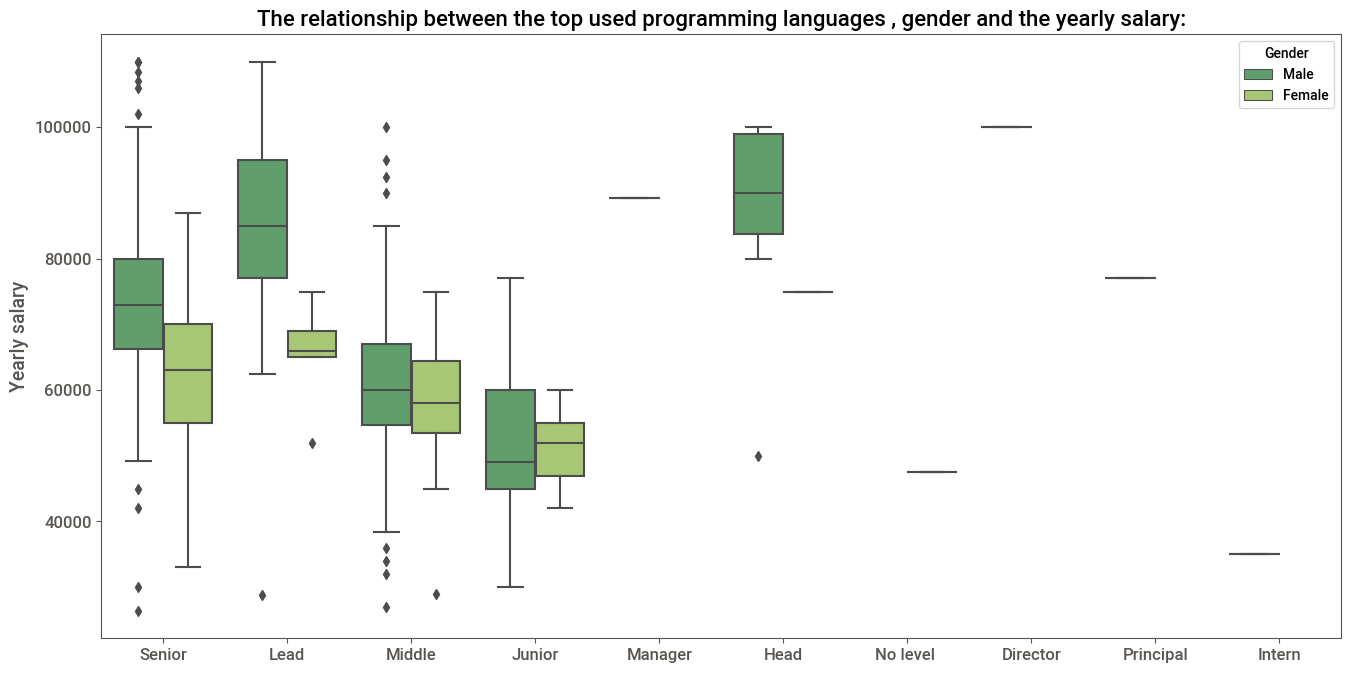

In [59]:
# the relationship between the seniory, gender and the yearly salary:

plt.figure(figsize = (16,8))
sns.boxplot(data = salary_language, x = 'Seniority level', y= 'Yearly salary', hue = 'Gender', palette = 'summer')
plt.title('The relationship between the top used programming languages , gender and the yearly salary:', fontsize = 16)
plt.xlabel('')
plt.ylabel('Yearly salary', fontsize= 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [60]:
# based on earlier analysis and the above plot, females seem to have 
# comparable experience and seniority level, but still their salaries are less at an average,
# especially when the seniority levels increase
# one good thing is at least at the junior level (people who have less experience)
# we see that females have higher mean salary compared to men
# Hope that this generation of females can bring back balance to the overall average over a period of time

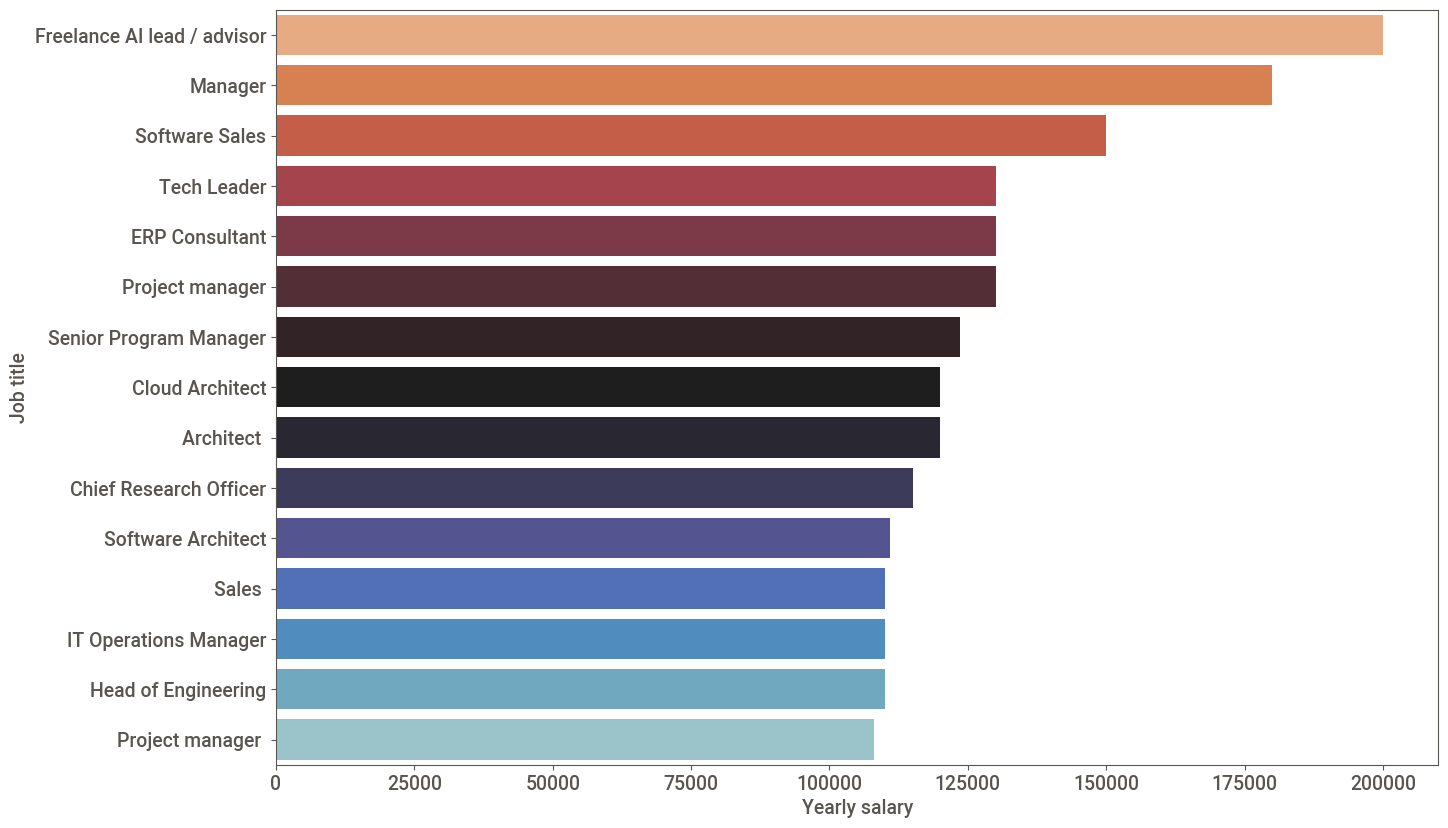

In [61]:
# Now let's look at the top positions
position = sal2.groupby('Position', as_index= False).median().sort_values('Yearly salary', ascending = False).head(15)

plt.figure(figsize= (15 , 10))
sns.barplot(data = position, y = 'Position', x = 'Yearly salary', palette = 'icefire_r')
plt.xlabel('Yearly salary', fontsize= 14)
plt.ylabel('Job title', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

In [62]:
# Let's generate another sweetviz report based on sal2 dataframe - which has cleaned up date
import sweetviz as sv
sal_sv_eda_report = sv.analyze(sal2,target_feat='Yearly salary')
sal_sv_eda_report.show_html('sal2_sv_eda_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sal2_sv_eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [63]:
# Let's compare the dataset (before and after data cleaning) using sweetviz
sal_sv_eda_report_compare = sv.compare(sal,sal2,target_feat='Yearly salary')

                                             |      | [  0%]   00:00 -> (? left)

KeyError: "Feature 'Yearly salary' was specified as TARGET, but is NOT FOUND in the dataframe (watch case-sensitivity?)."

In [64]:
# We need to change the name in the original sal dataset for the column

In [65]:
sal.rename(columns = {'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary'}, inplace = True)
sal.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [66]:
# Let's compare the dataset (before and after data cleaning) using sweetviz
sal_sv_eda_report_compare = sv.compare(sal,sal2,target_feat='Yearly salary')
sal_sv_eda_report_compare.show_html('sal_sv_eda_report_compare.html')

                                             |      | [  0%]   00:00 -> (? left)

Report sal_sv_eda_report_compare.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [67]:
# some comparisons are not happening because in sal2, we dropped a few columns.


In [68]:
sal2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 0 to 1252
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1250 non-null   int64 
 1   Gender               1241 non-null   object
 2   City                 1250 non-null   object
 3   Position             1245 non-null   object
 4   Years of experience  1250 non-null   int64 
 5   Seniority level      1239 non-null   object
 6   Main technology      1124 non-null   object
 7   Other technologies   1095 non-null   object
 8   Yearly salary        1250 non-null   int64 
 9   Vacation days        1250 non-null   int64 
 10  Employment status    1234 non-null   object
 11  Сontract duration    1222 non-null   object
 12  Language at work     1235 non-null   object
 13  Company size         1233 non-null   object
 14  Company type         1226 non-null   object
dtypes: int64(4), object(11)
memory usage: 156.2+ KB


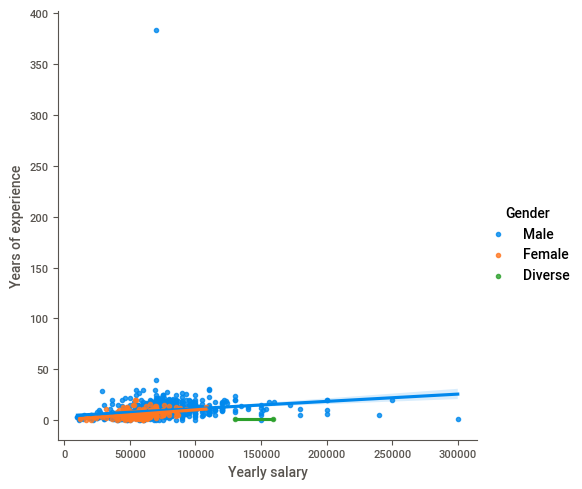

In [69]:
sns.lmplot(x = "Yearly salary",y='Years of experience',hue='Gender',data=sal2)

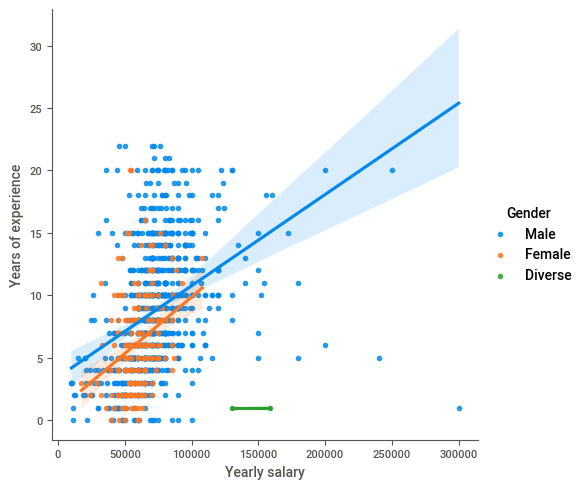

In [70]:
# let's use cleaned up data
sns.lmplot(x = "Yearly salary",y='Years of experience',hue='Gender',data=experience_seniority)

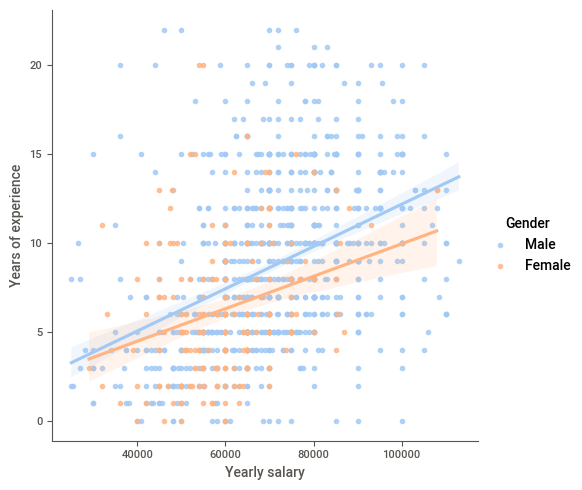

In [71]:
# let's look at data with cleaned up data from both salry and years of experience
salary_experience = outliers(experience, 'Yearly salary')
sns.lmplot(x = 'Yearly salary',y='Years of experience',hue='Gender',data=salary_experience,palette='pastel')

In [73]:
# Preditcion
salary_experience.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,29,Full-time employee,Unlimited contract,English,101-1000,Product
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,30,Full-time employee,Unlimited contract,English,11-50,Startup


In [74]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [75]:
#dependent Variable
Y=salary_experience['Yearly salary']
# independent Variable
X=salary_experience['Years of experience']
#Adding constant                        
X=sm.add_constant(X)
simple=sm.OLS(Y,X)
result=simple.fit()
result.summary()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Yearly salary   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     235.0
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.03e-48
Time:                        16:23:58   Log-Likelihood:                -12731.
No. Observations:                1157   AIC:                         2.547e+04
Df Residuals:                    1155   BIC:                         2.548e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 5.71e+04    871.998     65.485      0.000    5.54e+04    5.88e+04
Years of experience  1409.7386     91.964     15.329      0.000    1229.304    1590.173
==============================================================================
Omnibus:                       16.482   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.343
Skew:                           0.108   Prob(JB):                     3.14e-06
Kurtosis:                       3.692   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# The R-square value is very less / only 0.168. We expect it to be more than 70% for it to the considered as a good model

In [77]:
# Let's see if it changes if we add vacation days

#dependent Variable
Y=salary_experience['Yearly salary']
# independent Variable
X=salary_experience[['Years of experience',"Vacation days"]]
#Adding constant                        
X=sm.add_constant(X)
simple=sm.OLS(Y,X)
result=simple.fit()
result.summary()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Yearly salary   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     120.5
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           2.92e-48
Time:                        16:27:08   Log-Likelihood:                -12728.
No. Observations:                1157   AIC:                         2.546e+04
Df Residuals:                    1154   BIC:                         2.548e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.509e+04   1240.460     44.408      0.000    5.27e+04    5.75e+04
Years of experience  1399.4456     91.907     15.227      0.000    1219.121    1579.770
Vacation days          78.5764     34.442      2.281      0.023      11.001     146.152
==============================================================================
Omnibus:                       18.081   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.927
Skew:                           0.142   Prob(JB):                     1.42e-06
Kurtosis:                       3.691   Cond. No.                         88.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# It has only improved a little. There is something wrong with the dataset, let's look at one specific city

In [82]:
sal_exp_berlin = salary_experience[salary_experience['City'] == 'Berlin']
sal_exp_berlin.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,29,Full-time employee,Unlimited contract,English,101-1000,Product
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,30,Full-time employee,Unlimited contract,English,11-50,Startup
6,37,Male,Berlin,Frontend Developer,6,Middle,Javascript,NaN,57000,24,Full-time employee,Unlimited contract,English,11-50,Product


In [83]:
#dependent Variable
Y=sal_exp_berlin['Yearly salary']
# independent Variable
X=sal_exp_berlin[['Years of experience',"Vacation days"]]
#Adding constant                        
X=sm.add_constant(X)
simple=sm.OLS(Y,X)
result=simple.fit()
result.summary()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Yearly salary   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     60.69
Date:                Wed, 06 Apr 2022   Prob (F-statistic):           7.30e-25
Time:                        16:34:12   Log-Likelihood:                -7037.4
No. Observations:                 643   AIC:                         1.408e+04
Df Residuals:                     640   BIC:                         1.409e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.779e+04   1472.805     39.239      0.000    5.49e+04    6.07e+04
Years of experience  1302.3425    120.576     10.801      0.000    1065.571    1539.114
Vacation days          68.9353     35.512      1.941      0.053      -0.800     138.670
==============================================================================
Omnibus:                        8.992   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               12.655
Skew:                           0.109   Prob(JB):                      0.00179
Kurtosis:                       3.652   Cond. No.                         86.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
# even with city wise data, the r-squared value is small. let's look at a skill
sal_exp_Js = salary_experience[salary_experience['Main technology'] == 'Javascript']
sal_exp_Js.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
6,37,Male,Berlin,Frontend Developer,6,Middle,Javascript,NaN,57000,24,Full-time employee,Unlimited contract,English,11-50,Product
22,25,Male,Berlin,Software Engineer,5,Senior,Javascript,"Javascript / Typescript, AWS, Docker",65000,28,Full-time employee,Unlimited contract,German,1000+,Product
34,27,Male,Berlin,Software Engineer,8,Middle,Javascript,NaN,63000,24,Full-time employee,Unlimited contract,English,101-1000,Product
64,32,Male,Munich,Frontend Developer,7,Senior,Javascript,"Javascript / Typescript, Java / Scala",62000,30,Full-time employee,Unlimited contract,German,101-1000,Consulting / Agency


In [85]:
#dependent Variable
Y=sal_exp_Js['Yearly salary']
# independent Variable
X=sal_exp_Js[['Years of experience',"Vacation days"]]
#Adding constant                        
X=sm.add_constant(X)
simple=sm.OLS(Y,X)
result=simple.fit()
result.summary()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Yearly salary   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     9.059
Date:                Wed, 06 Apr 2022   Prob (F-statistic):            0.00103
Time:                        16:36:35   Log-Likelihood:                -311.52
No. Observations:                  29   AIC:                             629.0
Df Residuals:                      26   BIC:                             633.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.786e+04   9979.328      2.792      0.010    7346.323    4.84e+04
Years of experience  2474.9388    668.777      3.701      0.001    1100.248    3849.630
Vacation days         824.1390    301.242      2.736      0.011     204.926    1443.352
==============================================================================
Omnibus:                        0.562   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.755   Jarque-Bera (JB):                0.625
Skew:                           0.042   Prob(JB):                        0.732
Kurtosis:                       2.286   Cond. No.                         126.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# now, we see much higher R-square compared to previous items. But still it is not enough.
# Let's filter by location and also by skill
sal_exp_Js = sal_exp_berlin[sal_exp_berlin['Main technology'] == 'Javascript']
sal_exp_Js.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
6,37,Male,Berlin,Frontend Developer,6,Middle,Javascript,NaN,57000,24,Full-time employee,Unlimited contract,English,11-50,Product
22,25,Male,Berlin,Software Engineer,5,Senior,Javascript,"Javascript / Typescript, AWS, Docker",65000,28,Full-time employee,Unlimited contract,German,1000+,Product
34,27,Male,Berlin,Software Engineer,8,Middle,Javascript,NaN,63000,24,Full-time employee,Unlimited contract,English,101-1000,Product
113,0,Male,Berlin,QA Engineer,6,Middle,Javascript,"Javascript / Typescript, AWS",50000,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [87]:
#dependent Variable
Y=sal_exp_Js['Yearly salary']
# independent Variable
X=sal_exp_Js[['Years of experience',"Vacation days"]]
#Adding constant                        
X=sm.add_constant(X)
simple=sm.OLS(Y,X)
result=simple.fit()
result.summary()

/Users/sunshankar/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Yearly salary   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     5.376
Date:                Wed, 06 Apr 2022   Prob (F-statistic):             0.0155
Time:                        16:38:26   Log-Likelihood:                -211.98
No. Observations:                  20   AIC:                             430.0
Df Residuals:                      17   BIC:                             432.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.201e+04   1.03e+04      3.099      0.007    1.02e+04    5.38e+04
Years of experience  1997.1108    768.990      2.597      0.019     374.684    3619.538
Vacation days         772.4555    290.148      2.662      0.016     160.296    1384.615
==============================================================================
Omnibus:                        0.038   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.082
Skew:                           0.013   Prob(JB):                        0.960
Kurtosis:                       2.687   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
# it is still not high R-Square number. However, let's go ahead

In [91]:
salary_experience.head()

,Age,Gender,City,Position,Years of experience,Seniority level,Main technology,Other technologies,Yearly salary,Vacation days,Employment status,Сontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
3,28,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000,29,Full-time employee,Unlimited contract,English,101-1000,Product
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,30,Full-time employee,Unlimited contract,English,11-50,Startup


In [136]:

X=salary_experience.iloc[:,4:5].values
Y=salary_experience.iloc[:,8:9].values
XTrain,XTest,YTrain,YTest=train_test_split(X,Y,train_size=0.70, test_size=0.30,random_state=0)
linearRegressor=LinearRegression()
linearRegressor.fit(XTrain,YTrain)

LinearRegression()

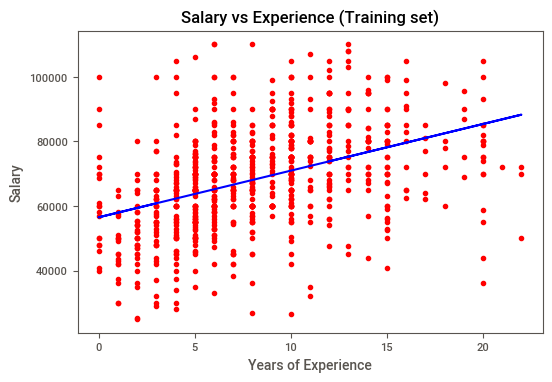

In [138]:
plt.scatter(XTrain, YTrain, color = 'red')
plt.plot(XTrain, linearRegressor.predict(XTrain), color = 'blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

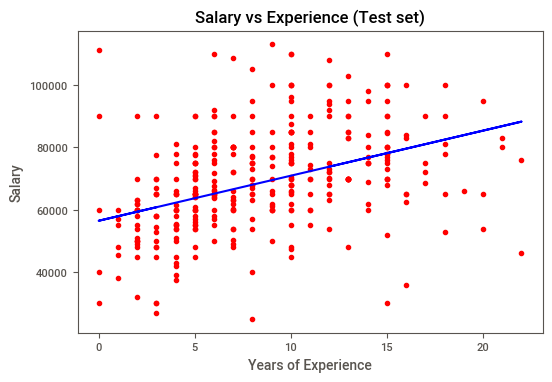

In [140]:
plt.scatter(XTest, YTest, color = 'red')
plt.plot(XTrain, linearRegressor.predict(XTrain), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


In [142]:
linearRegressor.score(XTrain,YTrain)

0.17857476501883707

In [143]:
linearRegressor.score(XTest,YTest)

0.1415405204933805